In [2]:
import pandas as pd

In [119]:
df1 = pd.read_csv(r'D:\DS\SpeechRecognise\bc\blueCarbuncul.csv').sort_values('id').reset_index(drop=True)
df2 = pd.read_csv(r'D:\DS\SpeechRecognise\nh\nottingHill.csv').sort_values('id').reset_index(drop=True)

In [120]:
df1.head()

,id,text,spectral_centroid,spectral_spread,spectral_entropy,spectral_flux,spectral_rolloff,zero_crossing_rate,energy,entropy_of_energy,pitch,sentiment_score
0,0,part 1,2460.253680,3900.762415,0.001038,0.915425,5355.701573,0.021423,0.381981,3.334463,5.512992,0.0000
1,1,I visited my friend Sherlock Holmes on the sec...,3282.409922,3547.835466,0.002009,1.439657,6148.856510,0.075149,0.857428,5.698216,9.136014,0.4939
2,2,when I arrived he was sitting in front of the ...,4311.528901,3870.092897,0.006654,1.591896,8293.889331,0.112708,0.744176,5.616033,26.320076,-0.3400
3,3,next to the sofa was a wooden chair and on the...,4253.684146,3783.745850,0.005302,1.661578,8067.689968,0.108963,0.683636,5.657398,30.081142,-0.4404
4,4,a magnifying glass and a forceps were on the c...,4291.350749,3719.192869,0.004234,1.657769,7973.407452,0.116753,0.757983,6.005482,31.034174,0.0000


In [121]:
df2.head()

,id,text,spectral_centroid,spectral_spread,spectral_entropy,spectral_flux,spectral_rolloff,zero_crossing_rate,energy,entropy_of_energy,pitch,sentiment_score
0,0,chapter one,1827.928426,2318.303428,0.288109,1.075800,3661.166958,0.030011,3.153268,NaN,6.818060,0.0000
1,1,just another Wednesday morning,2618.476149,3156.766317,0.002634,1.253586,5362.995427,0.051047,6.324341,4.732215,6.417086,0.0000
2,2,it was a fine spring morning,3050.731308,3422.439321,0.004528,1.146404,5873.764936,0.069284,5.054376,4.607934,8.775799,0.2023
3,3,William Thacker was looking out of his window ...,2713.620824,3184.041688,0.003196,1.365400,5064.385776,0.066694,5.766029,4.906423,12.936908,0.0000
4,4,Notting Hill,3181.248866,4292.322944,0.004200,1.045491,7669.587054,0.048465,1.157535,3.681241,6.218775,0.0000


In [146]:
df1.fillna(0,inplace=True)
df2.fillna(0,inplace=True)
# Делаем датафреймы одинакового размера, используя downsampling

# Берем первые n строк
n = 92
df1 = df1.head(n)
df2 = df2.head(n)
# if len(df1) > len(df2):
#     df1 = df1.sample(n=len(df2), replace=False, random_state=42)
# else:
#     df2 = df2.sample(n=len(df1), replace=False, random_state=42)

import nltk
nltk.download('punkt')

from nltk.tokenize import word_tokenize, sent_tokenize
def features_add(df):
    df['text_length'] = df['text'].apply(len)
    df['num_words'] = df['text'].apply(lambda x: len(word_tokenize(x)))
    df['num_unique_words'] = df['text'].apply(lambda x: len(set(word_tokenize(x))))
    # df['num_sentences'] = df['text'].apply(lambda x: len(sent_tokenize(x)))
    return df

df1 = features_add(df1)
df2 = features_add(df2)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [123]:
df1.shape

(92, 16)

In [124]:
df2.shape

(92, 16)

In [126]:
df2.head()

,id,text,spectral_centroid,spectral_spread,spectral_entropy,spectral_flux,spectral_rolloff,zero_crossing_rate,energy,entropy_of_energy,pitch,sentiment_score,text_length,num_words,num_unique_words,num_sentences
0,0,chapter one,1827.928426,2318.303428,0.288109,1.075800,3661.166958,0.030011,3.153268,0.000000,6.818060,0.0000,11,2,2,1
1,1,just another Wednesday morning,2618.476149,3156.766317,0.002634,1.253586,5362.995427,0.051047,6.324341,4.732215,6.417086,0.0000,30,4,4,1
2,2,it was a fine spring morning,3050.731308,3422.439321,0.004528,1.146404,5873.764936,0.069284,5.054376,4.607934,8.775799,0.2023,28,6,6,1
3,3,William Thacker was looking out of his window ...,2713.620824,3184.041688,0.003196,1.365400,5064.385776,0.066694,5.766029,4.906423,12.936908,0.0000,65,11,11,1
4,4,Notting Hill,3181.248866,4292.322944,0.004200,1.045491,7669.587054,0.048465,1.157535,3.681241,6.218775,0.0000,12,2,2,1


In [188]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.compose import ColumnTransformer
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))

# Создаем экземпляр лемматизатора
lemmatizer = WordNetLemmatizer()

# Функция для предобработки текста
def preprocess_text(text):
    # Приводим текст к нижнему регистру
    text = text.lower()
    
    # Токенизируем текст
    tokens = word_tokenize(text)
    
    # Удаляем стоп-слова
    filtered_tokens = [token for token in tokens if not token in stop_words]
    
    # Лемматизируем токены
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]
    
    # Объединяем токены обратно в текст
    preprocessed_text = ' '.join(lemmatized_tokens)
    
    return preprocessed_text




# Добавляем столбец "author" со значениями 0 и 1
df1['author'] = 0
df2['author'] = 1

# Объединяем датафреймы
df = pd.concat([df1, df2], ignore_index=True)
# Применяем функцию предобработки к столбцу 'text'
df['text'] = df['text'].apply(preprocess_text)

# Разбиваем на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(df.drop('author', axis=1), df['author'], test_size=0.3, random_state=42)

# Создаем пайплайн для текстовых признаков
text_transformer = Pipeline([
    ('vect', CountVectorizer()),
    ('scaler', StandardScaler(with_mean=False))
])

# Создаем колонки с числовыми признаками
numeric_features = ['spectral_centroid', 'spectral_spread', 'spectral_entropy', 'spectral_flux', 'spectral_rolloff',
       'zero_crossing_rate', 'energy', 'entropy_of_energy', 'pitch', 'sentiment_score','text_length', 'num_words',
       'num_unique_words']

# Создаем пайплайн для числовых признаков
numeric_transformer = Pipeline([
    ('scaler', StandardScaler())
])

# Объединяем пайплайны для текстовых и числовых признаков
preprocessor = ColumnTransformer(
    transformers=[
        ('text', text_transformer, 'text'),
        ('num', numeric_transformer, numeric_features)
    ])

# Создаем модель для классификации
clf = Pipeline([
    ('preprocessor', preprocessor),
    ('clf', RandomForestClassifier(n_estimators=500, random_state=42))

])

# Обучаем модель на обучающей выборке
clf.fit(X_train, y_train)

# Получаем предсказания для тестовой выборки
y_pred = clf.predict(X_test)

# Оцениваем качество модели
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        26

    accuracy                           1.00        56
   macro avg       1.00      1.00      1.00        56
weighted avg       1.00      1.00      1.00        56



In [189]:
importances = clf.named_steps['clf'].feature_importances_


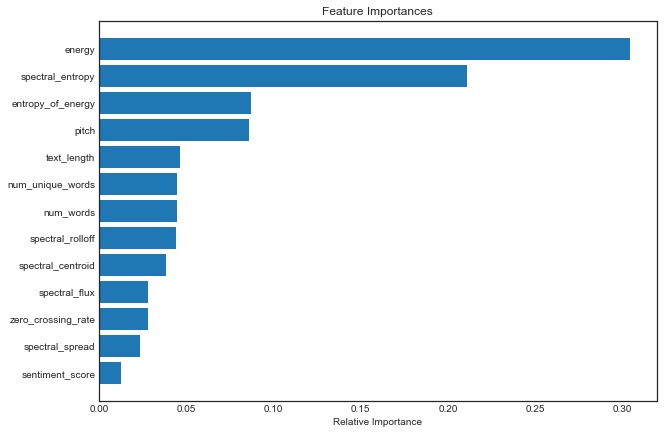

In [191]:
import matplotlib.pyplot as plt

features = X_train.drop(['id','text'], axis=1).columns
indices = np.argsort(importances)

plt.figure(figsize=(10, len(features)/2))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

C:\Users\Administrator\AppData\Local\Temp\2\ipykernel_20528\3881079197.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


Text(0.5, 1.0, 'Pitch')

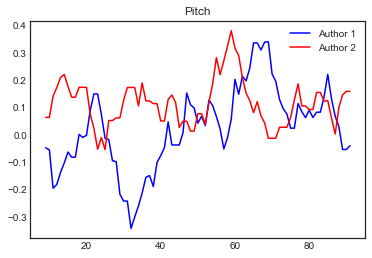

In [160]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')


# создаем график
fig, ax = plt.subplots()

# отображаем линии
df1['sentiment_score'].rolling(10).mean().plot(ax=ax, color='blue', label='Author 1')
df2['sentiment_score'].rolling(10).mean().plot(ax=ax, color='red', label='Author 2')

# df2.spectral_entropy.plot(ax=ax, color='red', label='Author 2')

# добавляем легенду и название графика
ax.legend()
ax.set_title('Pitch')

In [ ]:
# spectral_centroid - яркость звука (тембра), преобладание звуков высоких или низких частот
# spectral_spread - Спектральное распределение (частотное распределение) - Большое значение spectral_spread означает, что звук содержит широкий диапазон частот, а малое значение - что звук сосредоточен в узком диапазоне частот
# spectral_entropy -  Спектральная энтропия описывает сложность системы: например, речь будет иметь низкое значение, а белый шум — очень высокое
# spectral_flux - скорость изменения звука во времени. высокое значение spectral flux в одном файле по сравнению с другим может указывать на большее разнообразие звуков и более быстрые изменения в этом файле
# spectral_rolloff - Спектральная крутизна - это частота, ниже которой расположено определенное процентное количество (85%) от общей мощности спектра звука. При сравнении двух аудиофайлов спектральный отсечной уровень может указывать на наличие или отсутствие высокочастотных компонент в звуковых записях.
# Zero Crossing Rate (ZCR) - это количество раз, когда знак аудио сигнала меняется от положительного к отрицательному или наоборот (звуки с более высокой частотой пересечения нуля обычно звучат более "трескуче" и более "шипяще", шумные, чем звуки с более низкой частотой пересечения нуля.)
# energy: энергия - уровень громкости
# entropy_of_energy: энтропия энергии - мера разнообразия энергетических значений звуковой волны. Большая энтропия энергии может указывать на более сложный и разнообразный сигнал, а меньшая энтропия - на более простой и однородный сигнал.
# pitch: высота тона - вычисляется как частота основного тона звука. При анализе двух аудиофайлов этот признак может показать различия в мелодиях или интонациях. Например, если один аудиофайл содержит пение, а другой говор, то они будут иметь разные основные частоты звучания
# sentiment_score: балл тональности - числовая оценка тональности звука, вычисленная с помощью алгоритма анализа тональности


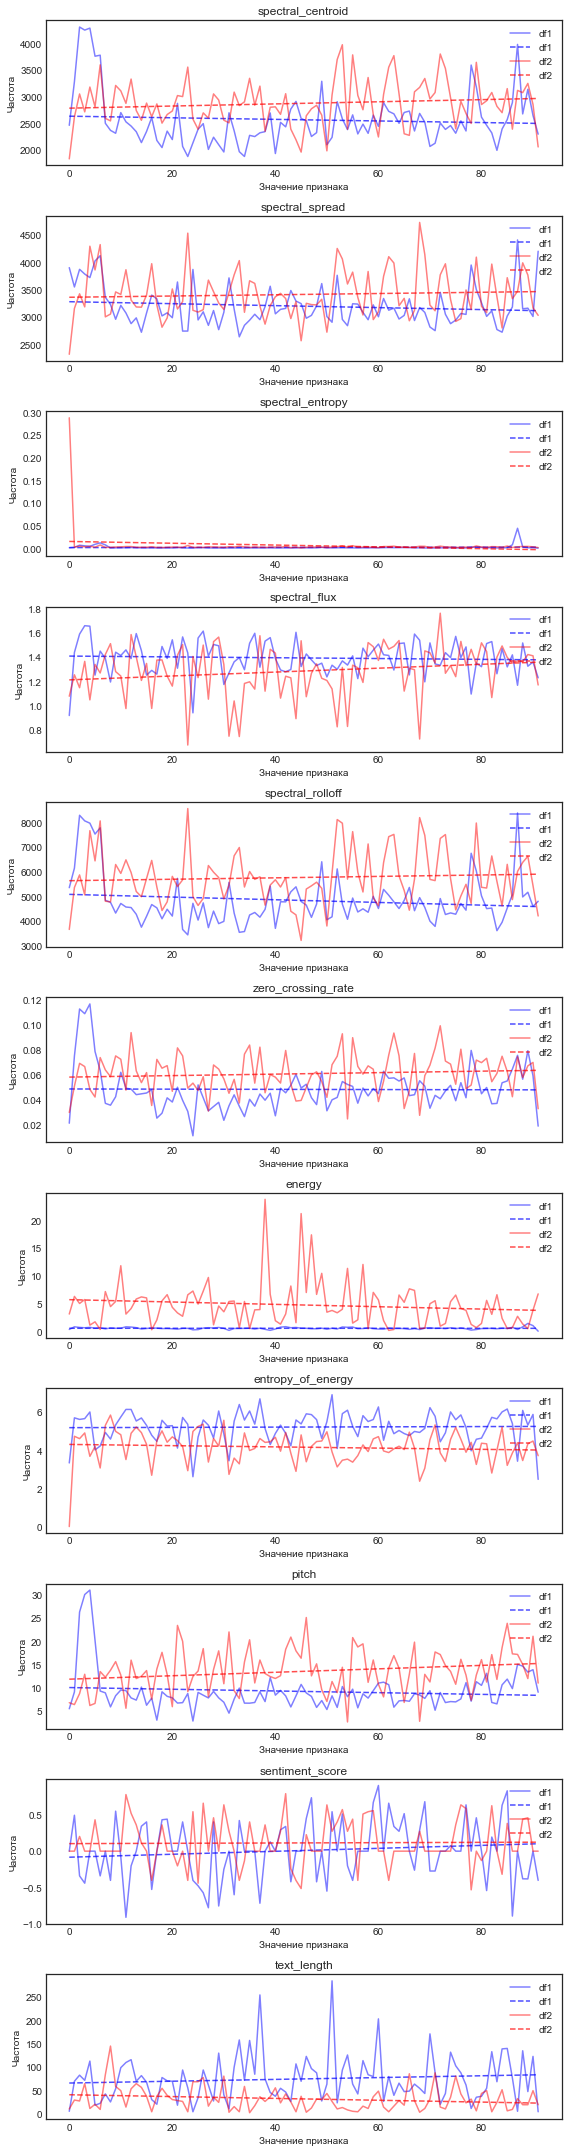

In [173]:
import numpy as np
import matplotlib.pyplot as plt

# список признаков
features = ['spectral_centroid', 'spectral_spread', 'spectral_entropy', 'spectral_flux', 'spectral_rolloff',
            'zero_crossing_rate', 'energy', 'entropy_of_energy', 'pitch', 'sentiment_score','text_length']

# создаем сетку графиков
fig, axs = plt.subplots(len(features), 1, figsize=(8, 30))
colors = ['blue', 'red']

# для каждого признака
for i, feature in enumerate(features):
    # отображаем гистограмму признака для каждого датафрейма
    for j, df in enumerate([df1, df2]):
        # axs[i].hist(df[feature], color=colors[j], alpha=0.5, bins=50, density=True)
        axs[i].plot(df[feature], color=colors[j], alpha=0.5)

        # вычисляем коэффициенты линейной регрессии
        x = np.arange(len(df[feature]))
        y = df[feature]
        coeffs = np.polyfit(x, y, 1)
        # добавляем линию тренда
        axs[i].plot(x, np.polyval(coeffs, x), color=colors[j], alpha=0.7, linestyle='--')

    # добавляем заголовок и метки осей
    axs[i].set_title(feature)
    axs[i].set_xlabel('Значение признака')
    axs[i].set_ylabel('Частота')
    # axs[i].legend(['df{}'.format(j+1) for j in range(len([df1, df2]))], loc='upper right')
    # axs[i].legend(['df{} (линия)'.format(j+1) if j==1 else 'df{}'.format(j+1) for j in range(len([df1, df2]))], loc='upper right')
    axs[i].legend(['df1', 'df1','df2','df2'], loc='upper right')

plt.tight_layout()
plt.show()